<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
# 2 逻辑回归(logistic regression)
   在分类问题中，我们要预测的y值是离散的值，我们将运用到逻辑回归（logistic regression）算法。在分类问题中，我们期望预测的值属于某一类。以二分类任务为例，其输出标签值$y\in\{0, 1\}$,而线性回归模型产生的预测值$z=w^Tx+b$是实数值，于是我们需将$z$转换为$0/1$，最理想的是单位阶跃函数，如下图所示。

![](Images/2_01.jpg)

然而单位阶跃函数不连续，于是我们希望能找到能在一定程度上近似单位阶跃函数的“替代函数”,并希望它单调可微，Sigmoid函数正是这样一个函数：
$$ y= f(x,w,b)=\frac{1}{1+e^{-(w^Tx+b)}}$$

![](Images/2_1.jpg)

上式可以变化为：
$$ ln\frac{y}{1-y} = w^Tx+b$$
我们将$y$值视为样本$x$为正例的可能性，则$1-y$为其反例的可能性。若将$y$视为类后验概率$p(y=1|x)$，则$1-y$为 后验概率$p(y=0|x)$，因而有
$$ ln\frac{p(y=1|x)}{p(y=0|x)} = w^Tx+b$$
显然有：
$$p(y=1|x)=\frac{e^{(w^Tx+b)}}{1+e^{(w^Tx+b)}}$$
$$p(y=0|x)=\frac{1}{1+e^{(w^Tx+b)}}$$
于是上述公式可以改写为：
$$p(y=i|x_i;w,b)=y_i p(y=1|x_i;w,b) + (1-y_i) p(y=0|x_i;w,b)$$
于是我们可以通过‘极大似然法’来估计$w$和$b$，即是下式最大化：
$$l(w,b) = \sum_{i=1}^{m}ln p(y=i|x_i;w,b)$$
等价于使下式最小化
$$ J(w,b)=-1/m\sum_{i=1}^{m}ln p(y=i|x_i;w,b)=-1/m\sum_{i=1}^{m}ln y_i p(y=1|x_i;w,b) + (1-y_i) p(y=0|x_i;w,b)$$
因而$J(w,b)$即为逻辑回归的代价函数。



In [113]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [114]:
x, y = make_blobs(n_features=1, n_samples=100, centers=2)


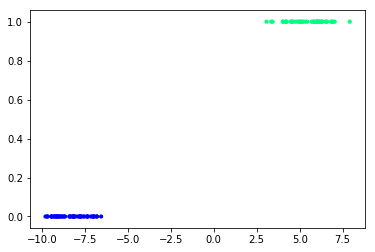

In [115]:
plt.scatter(x, y, c=y, s=10, cmap='winter')

In [116]:
def model(x, w):
    return 1/(np.exp(-w*x)+1)

def CostFunction(x, y, w):
    m = len(x)
    error = 0
    for xi, yi in zip(x, y):
        error += yi*np.log10(model(xi, w)) + (1-yi)*np.log10(1-model(xi, w))
    return -1*error/m

In [117]:
# 定义梯度下降函数求解

def GradientDescent(x, y, w, alpha):
    tem = [w]
    eps = 10
    while abs(eps) > 0.0005:
        g = (CostFunction(x, y, w+0.01)-CostFunction(x, y, w-0.01))/0.02
        w = w - g*alpha
        eps = w - tem[-1]
        tem.append(w)
    return tem

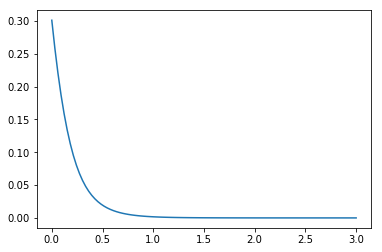

In [118]:
# 代价函数可视化

error_w = np.linspace(0, 3, 100)
error = []
for wi in error_w:
    error.append(CostFunction(x, y, wi))
plt.plot(error_w, error)

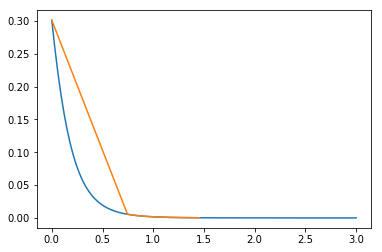

In [119]:
# 梯度下降可视化（学习率为0.5），w初始值为0

tem = GradientDescent(x, y, 0, 0.5)
error_tem = [CostFunction(x, y, tem_i) for tem_i in tem]
plt.plot(error_w , error)
plt.plot(tem, error_tem)


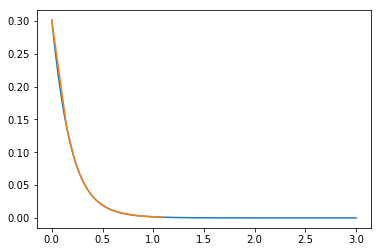

In [120]:
# 梯度下降可视化（学习率为0.1），w初始值为0

tem = GradientDescent(x, y, 0, 0.1)
error_tem = [CostFunction(x, y, tem_i) for tem_i in tem]
plt.plot(error_w , error)
plt.plot(tem, error_tem)


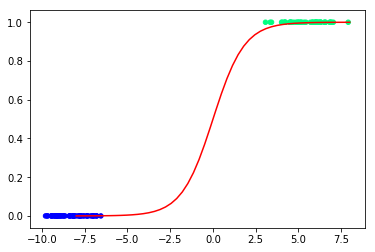

In [121]:
#  预测y值与训练集进行比较（w=2）

plt.scatter(x, y, c=y, cmap='winter', s=20)
x_range = np.linspace(-8, 8, 50)
y_pred = [model(xi, tem[-1]) for xi in x_range ]
plt.plot(x_range, y_pred, c='r')

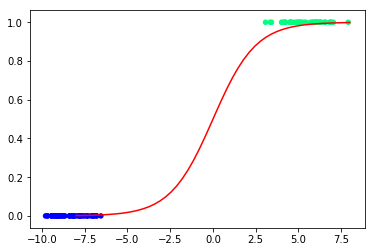

In [122]:
#  预测y值与训练集进行比较（w=0.8）

plt.scatter(x, y, c=y, cmap='winter', s=20)
x_range = np.linspace(-8, 8, 50)
y_pred = [model(xi, 0.8) for xi in x_range ]
plt.plot(x_range, y_pred, c='r')

# 利用sklearn 实现逻辑回归

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
LR = LogisticRegression()
LR.fit(x, y)
y_pred = LR.predict(x_range)
plt.scatter(x, y, c=y, cmap='winter')
plt.plot(x_range, y_pred)

AttributeError: 'LogisticRegression' object has no attribute 'pred'

In [1]:
x_range

NameError: name 'x_range' is not defined